# XGBoost + ADASYN + ปรับ Threshold 0.423

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report,precision_recall_curve

# Train set

In [21]:
data=pd.read_csv("file/train_df.csv")
df=pd.DataFrame(data)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,0,0,66,1,1,61.15,4017.45,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,1,0,0,0,65,1,1,84.85,5459.20,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,0,0,1,1,72,1,0,20.35,1354.40,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0,0,1,1,68,1,1,72.95,4953.25,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0,0,1,1,12,0,0,35.50,432.25,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0,0,0,0,63,1,0,104.50,6590.80,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4221,0,0,0,0,1,1,0,51.25,51.25,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4222,1,0,1,0,71,1,0,109.25,7707.70,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4223,1,0,1,0,24,1,0,20.40,482.80,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [22]:
X = df.drop(columns=['Churn'])
y = df['Churn']

# Val set

In [23]:
data=pd.read_csv("file/val_df.csv")
val_df=pd.DataFrame(data)
val_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,0,0,2,0,0,24.30,38.45,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0,0,1,1,70,1,1,106.05,7554.05,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1,0,1,1,7,1,0,69.45,477.05,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,0,0,0,0,9,1,1,75.85,724.65,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1,0,1,0,26,1,0,85.90,2196.45,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,0,0,0,2,1,1,74.90,136.05,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1405,1,0,1,1,12,1,1,58.35,740.55,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1406,1,0,0,0,58,1,1,95.30,5817.70,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1407,0,0,1,1,6,1,0,19.55,122.90,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [24]:
X_val = val_df.drop(columns=['Churn'])
y_val = val_df['Churn']

# Test set

In [25]:
data=pd.read_csv("file/test_df.csv")
test_df=pd.DataFrame(data)
test_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,1,0,31,1,1,64.00,1910.75,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,1,1,1,0,54,1,1,101.50,5373.10,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,1,0,1,0,59,1,1,109.15,6557.75,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,1,0,0,0,9,1,0,80.55,653.90,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,0,0,0,49,1,1,66.15,3199.00,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,1,0,0,56,1,0,104.75,5841.35,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1405,1,0,0,1,46,1,1,105.20,4822.85,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1406,1,0,1,1,16,1,1,89.45,1430.25,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1407,0,0,0,0,4,1,1,79.90,324.30,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [26]:
X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

# variable 

In [27]:
X = X[['Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges','OnlineSecurity_No','TechSupport_No']]
y = y

X_val = X_val[['Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges','OnlineSecurity_No','TechSupport_No']]
y_val = y_val

X_test = X_test[['Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges','OnlineSecurity_No','TechSupport_No']]
y_test = y_test


# AdaSyn

In [28]:
adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X, y)

# Before Threshold tuning

In [29]:
xg_model = XGBClassifier(colsample_bytree=1,learning_rate = 0.1, max_depth = 3,min_child_weight = 1,n_estimators = 50,num_round = 50,subsample = 0.5,random_state=42)
xg_model.fit(X_ada, y_ada)
y_pred = xg_model.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.55      0.76      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:57:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Thresholds tuning

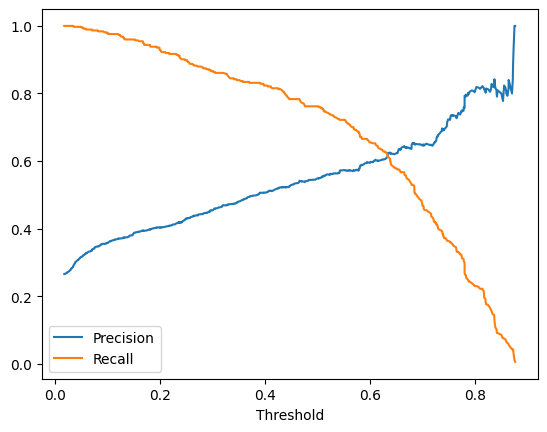

In [ ]:
y_prob = xg_model.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [31]:
pos_label = 0
scorer = make_scorer(f1_score, pos_label=pos_label)
xg_model = XGBClassifier(colsample_bytree=1,learning_rate = 0.1, max_depth = 3,min_child_weight = 1,n_estimators = 50,subsample = 0.5,random_state=42)
model = TunedThresholdClassifierCV(xg_model, scoring=scorer)
scorer(model.fit(X_ada, y_ada), X_ada, y_ada)

0.832641328648994

## After Threshold Tuning

In [ ]:
xg_model = XGBClassifier(colsample_bytree=1,learning_rate = 0.1, max_depth = 3,min_child_weight = 1,n_estimators = 50,num_round = 50,subsample = 0.5,random_state=42)
xg_model.fit(X_ada, y_ada)
y_pred = xg_model.predict(X_val)
y_prob = xg_model.predict_proba(X_val)[:, 1]

threshold = 0.423
y_pred_new = (y_prob >= threshold).astype(int)

print(f"--- Classification Report at Threshold {threshold} ---")
print(classification_report(y_val, y_pred_new))


--- Classification Report at Threshold 0.423 ---
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1035
           1       0.52      0.82      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:57:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Test set 

In [ ]:
xg_model = XGBClassifier(colsample_bytree=1,learning_rate = 0.1, max_depth = 3,min_child_weight = 1,n_estimators = 50,num_round = 50,subsample = 0.5,random_state=42)
xg_model.fit(X_ada, y_ada)
y_pred = xg_model.predict(X_test)
y_prob = xg_model.predict_proba(X_test)[:, 1]

threshold = 0.423
y_pred_new = (y_prob >= threshold).astype(int)

print(f"--- Classification Report at Threshold {threshold} ---")
print(classification_report(y_test, y_pred_new))

--- Classification Report at Threshold 0.423 ---
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:57:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Export final model

In [ ]:
xg_model = XGBClassifier(colsample_bytree=1,learning_rate = 0.1, max_depth = 3,min_child_weight = 1,n_estimators = 50,num_round = 50,subsample = 0.5,random_state=42)
xg_model.fit(X_ada, y_ada)
y_pred = xg_model.predict(X_test)
y_prob = xg_model.predict_proba(X_test)[:, 1]

threshold = 0.423
y_pred_new = (y_prob >= threshold).astype(int)

print(f"--- Classification Report at Threshold {threshold} ---")
print(classification_report(y_test, y_pred_new))

# Export
joblib.dump(xg_model, 'xg_model.joblib')

--- Classification Report at Threshold 0.423 ---
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:57:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['xg_model.joblib']